In [4]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def set_style():
    sns.set_context("paper")
    sns.set(font='serif', font_scale = 1.5)
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white'
    })

/anaconda3/envs/dempref/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


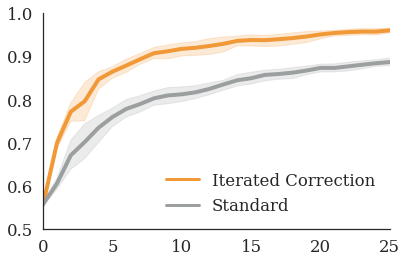

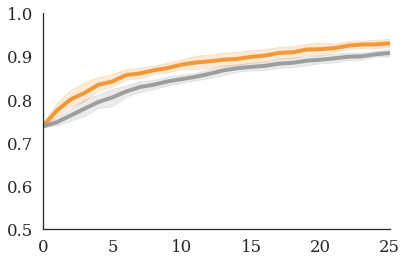

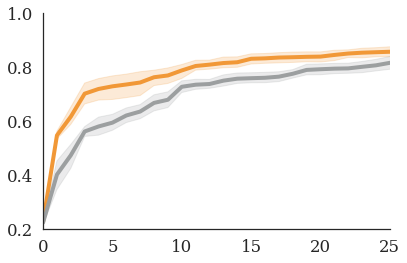

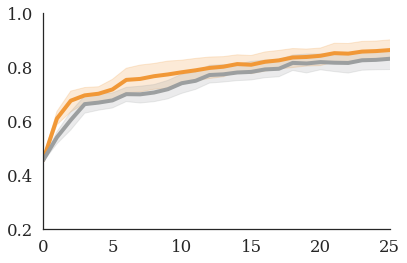

In [15]:
# optimal human
i = 0

colors = ["#F19837",  "#9C9FA0", "#327ECC"]

for domain in ["driver", "lander"]:
    for quality in ["worst", "best"]:
        set_style()
        plt.figure(i)
        d_map = {'driver': "Driver", "lander": "Lunar Lander", "fetch_move": "Fetch Reach", "fetch_push": "Fetch Push"}
        q_map = {"worst": "Low", "best": "High"}
#         plt.title(f"Domain: {d_map[domain]}, Demo Quality: {q_map[quality]}\n")
        df = pd.DataFrame(np.zeros((0,5)), columns=["run #", "pref_iter", "type", "value", "quality/CIA"])
        palette = {}
        for inc_prev_query in [True, False]:
            name = f"results/domain={domain},quality={quality},IC={inc_prev_query}_db.pickle"
            db = pickle.load(open(name, 'rb'), encoding='bytes')
            if inc_prev_query:
                label = f"Iterated Correction"
            else:
                label = "Standard"
            db["quality/CIA"] = label
            palette[label] = colors[[True, False].index(inc_prev_query)]
            df = df.append(db, ignore_index=True)
        m = df[df.type=='m']
        m["value"] = pd.to_numeric(m["value"])
        ax = sns.lineplot(x='pref_iter', y='value', hue="quality/CIA", data=m, lw=4, palette=palette)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        l = plt.legend()
        handles, labels = ax.get_legend_handles_labels()
        leg = ax.legend(handles=handles[1:], labels=labels[1:], frameon=False)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(3.0)
        plt.xlabel("")
        plt.ylabel("")
        plt.xlim([0,25])
        plt.ylim([0.5,1])
        plt.xticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25])
        if domain != "driver" or quality != "worst":
            ax.get_legend().remove()
        if domain == "lander":
            plt.ylabel("")
            plt.ylim([0.2,1])
        if quality == "low":
            plt.xlabel("")
        plt.tight_layout()


        i += 1